In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv ('../data/insurance_data.csv')
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Province', 'Zipcode', 'Gender', 'Total_Claim',
       'Premium'],
      dtype='object')


,Unnamed: 0,Province,Zipcode,Gender,Total_Claim,Premium
0,0,C,1003,Female,652.740226,898.493109
1,1,A,1003,Female,1159.389368,1040.563548
2,2,C,1003,Male,729.641413,1137.593249
3,3,C,1003,Female,253.524198,764.332164
4,4,A,1001,Male,938.056933,1349.828367


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Province     1000 non-null   object 
 2   Zipcode      1000 non-null   int64  
 3   Gender       1000 non-null   object 
 4   Total_Claim  1000 non-null   float64
 5   Premium      1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None
        Unnamed: 0      Zipcode  Total_Claim      Premium
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    499.500000  1001.999000   931.049722  1112.742919
std     288.819436     0.817109   566.679835   198.269534
min       0.000000  1001.000000    27.339840   527.702050
25%     249.750000  1001.000000   513.545195   984.410128
50%     499.500000  1002.000000   816.332296  1115.189886
75%     749.250000  1003.000000  1225.736472  1252.291547
max     999.000000  1003.00

In [11]:
print(df.dtypes)


Unnamed: 0       int64
Province        object
Zipcode          int64
Gender          object
Total_Claim    float64
Premium        float64
dtype: object


In [12]:
print(df.isnull().sum())


Unnamed: 0     0
Province       0
Zipcode        0
Gender         0
Total_Claim    0
Premium        0
dtype: int64


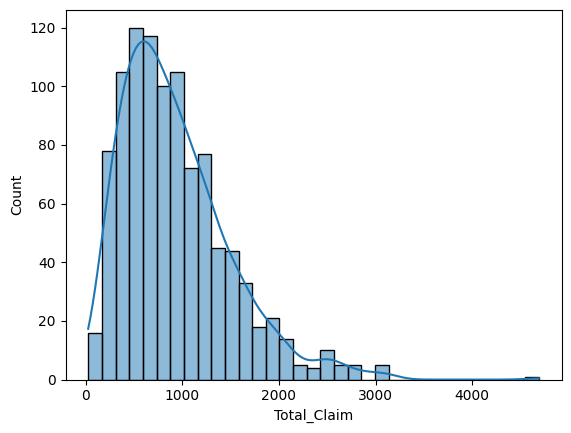

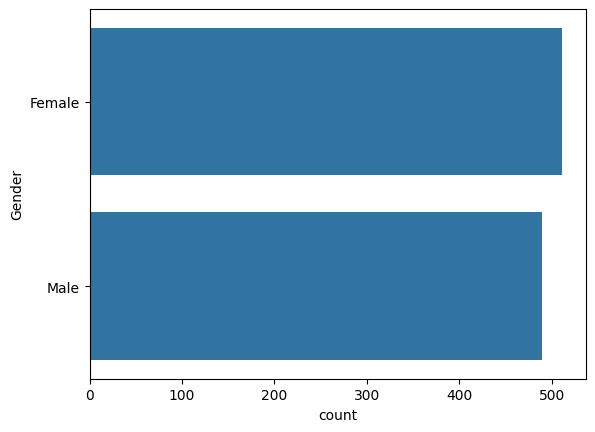

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total_Claim'], kde=True)
plt.show()

sns.countplot(df['Gender'])
plt.show()
